<img src='./fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>

<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Fundamentos Matemáticos del Análisis de Datos (FMAD). 2022-2023.
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
07 Introduction to Models. Part 1.
<a class="tocSkip">   
</h1>  

In [30]:
# Standard Data Science Libraries Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
import scipy.stats as stats

#sns.set(rc={'figure.figsize':(12, 8.5)})
sns.set()

# Studying the Relation Between Two Variables

## Introduction

+ In the previous sessions we have focused in the study of a single random variable by itself. But in almost every real dataset the most interesting question is the possible relations between variables. In this session we will take a first step into the analysis of those relations. You will get a much deeper understanding of the subject in Machine Learning.

+ However, since this is just a first step we will mainly consider the simpler version of the problem. That is we will focus in the relation between two variables and we will only hint at the problem of the more-than-two variables relations. 

+ In Mathematics, and specifically in Calculus, you have come across the idea of a **function** such as
$$
y = f(x)
$$
describing the relation between an **independent variable** $x$ and the **dependent variable** $y$. These variables can be linked together through an expression such as
$$
y = \sin(3x)\cos(7x)
$$
which is represented by a graph such as:
![](./fig/07-FuncionTrigonometrica.png)
The kind of relations between variables that we study in Calculus can be very complicated by they are always **deterministic**: given the value of $x$ there is one (at most) and only one fixed value of $y$. These functions are used to model theoretically predictable relations between variables such as the Laws of Physics, unit conversions, etc.

+ But deterministic relations are not enough to describe many situations were measures and observations with **random noise or uncertainty** are involved. That uncertainty makes the relation between variables not deterministic but random. We will often use the terminology of *signal* and *noise* to describe this situation, and to distinguish between the relation that we are trying to uncover (that is, the signal) and the noise that partially hides or masks that relation. 

+ However, even when the nature of the relation is not deterministic, in many cases we still want to use the values of one variable to *predict* or *estimate* the values of a different variable. So let us consider two random variables $X$ and $Y$. We will use the symbol 
$$
\quad\\
Y \sim X
\quad\\
$$
to denote a relation between these variables. Here $X$ is the **input or explanatory** variable, while $Y$ is the **output or response** variable.  

+ Depending on the type of variables involved we can find ourselves in one of these four common situations:
<div class="center">
<table>
<tbody>
<tr class="odd">
<th style="text-align: center;"></th>
<th style="text-align: center;"></th>
<th colspan="2" style="text-align: center;"><strong>Response variable <span
class="math inline"><em>Y</em></span></strong></th>
</tr>
<tr class="even">
<td style="text-align: center;"></td>
<td style="text-align: center;"></td>
<td style="text-align: center;"><strong>Quantitative (numeric) <span
class="math inline"><em>N</em></span></strong></td>
<td style="text-align: center;"><strong>Factor <span
class="math inline"><em>F</em></span></strong></td>
</tr>
<tr class="odd">
<td style="text-align: left;"><strong>Explanatory variable <span
class="math inline"><em>X</em></span></strong></td>
<td style="text-align: center;"><strong>Quantitative (numeric) <span
class="math inline"><em>N</em></span></strong></td>
<td style="text-align: center;"><strong><span
class="math inline"><em>N</em> ∼ <em>N</em></span> (Linear Regression)</strong></td>
<td style="text-align: center;"><strong><span
class="math inline"><em>F</em> ∼ <em>N</em></span> (Logistic Regression)</strong></td>
</tr>
<tr class="even">
<td style="text-align: center;"></td>
<td style="text-align: center;"><strong>Factor <span
class="math inline"><em>F</em></span></strong></td>
<td style="text-align: center;"><strong><span
class="math inline"><em>N</em> ∼ <em>F</em></span> (t-test, Anova)</strong></td>
<td style="text-align: center;"><strong><span
class="math inline"><em>F</em> ∼ <em>F</em></span> (<span
class="math inline"><em>χ</em><sup>2</sup></span> test)</strong></td>
</tr>
</tbody>
</table>
</div>  
For each of these situations we have indicated in parenthesis the name of the most important statistical methods that address each of them. We will discuss each of these situations below, very briefly in some cases. But first let us discuss the exploratory approach to each of these relations.

+ **Note:** we already know that the border between continuous and discrete numerical variables is fuzzy. Here we want to emphasize that the other end of the discrete spectrum also has a fuzzy border. That is, a discrete numerical variable with just a very few levels may just be acting as a factor in disguise or, even when really numeric, can often be treated as an ordered factor without harm.

## Two Numeric Variables

+ The usual graphic device to study the relation between two numeric variables is the *scatter plot* (in Spanish, *diagrama de dispersión*). in this kind of diagram we plot points $(x, y)$ in the plane where $x$ and $y$ are the values of $X$ and $Y$ respectively for the *same observation* in our data set (the same row of the table). 

+ **Example:** let us consider the  [`mpg` data set (csv link)](https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/mpg.csv). Ans suppose that we are interested in the possible relation between the variables corresponding to highway `hwy` vs urban `cty` fuel consumption (miles per gallon) for the car models corresponding to the data in that table. Here we consider the `cty` variable as the explanatory/input variable $X$ (horizontal axis) and the `hwy` variable as the response/output variable $Y$ (vertical axis). Then we can use the plot function in Matplotlib to get a scatter plot like this

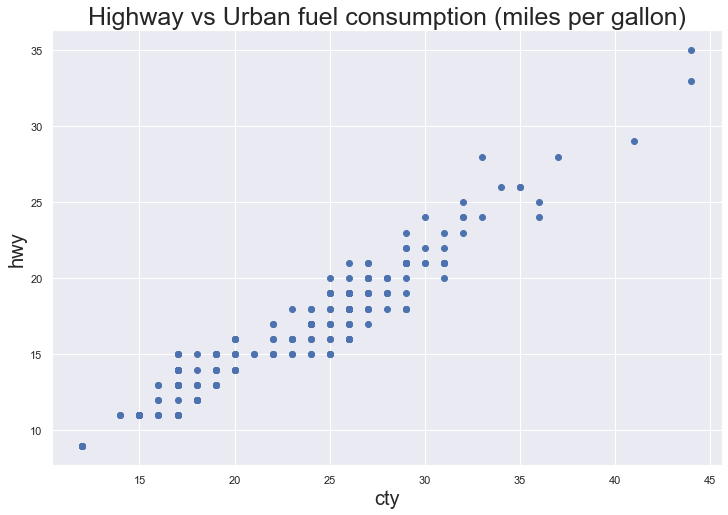

In [31]:
mpg_link = "https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/mpg.csv"
mpg = pd.read_csv(mpg_link)

sns.set(rc={'figure.figsize':(12, 8)})
plt.plot('hwy', 'cty', 'bo', data=mpg)
plt.xlabel('cty', fontdict={'fontsize':20})   
plt.ylabel('hwy', fontdict={'fontsize':20})
plt.title('Highway vs Urban fuel consumption (miles per gallon)', fontdict={'fontsize':25})
plt.show()


+ We will study these particular kind of relations below in greater detail, so for the time being we stop here.

## A numeric variable $Y$ as response and a factor $F$ as explanatory.

+ In this case we prefer to use the notation 
$$Y\sim F$$
(instead of $Y\sim X$) to emphasize that the input or explanatory variable is a factor.


+ For this kind of relation we have several graphic resources available. 

### Group boxplots

+ Since the $Y$ variable is numeric, we can use e.g. a boxplot to plot the distributions of its values. And since $F$ is a factor with several levels we can group the observations by levels and draw a different boxplot of $Y$ for each level. 

+ **Example:** still with the `mpg` data set, we can try to explore the possible relation between the `cty` (continuous numeric) variable and the `class` (factor) variable, that describes the type of car (with levels such as ). 

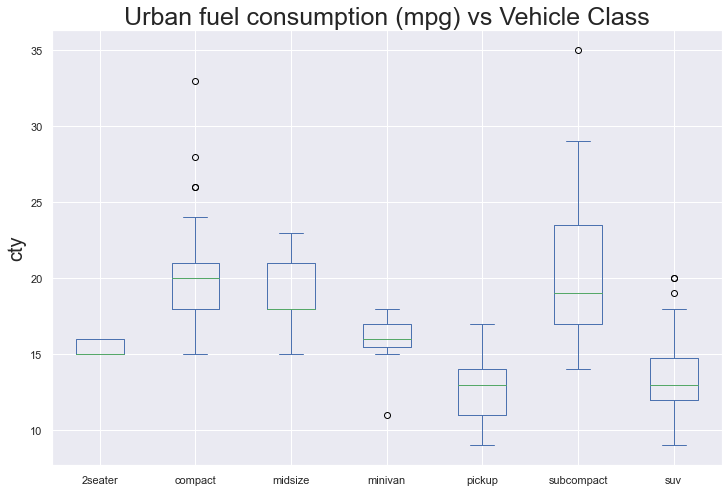

In [32]:
mpg.plot.box(column = 'cty', by = 'class')
plt.ylabel('cty', fontdict={'fontsize':20})   
plt.title('Urban fuel consumption (mpg) vs Vehicle Class', fontdict={'fontsize':25})
plt.show()

+ However, this plot is not entirely satisfactory. It would be nicer to order the levels of `class` with respect to the median values of `cty` so that the graph conveys the relation in a visually clear way. The order we want is the index of this table:

In [33]:
mpg[['cty', 'class']].groupby('class').median().sort_values('cty')

,cty
class,
pickup,13.0
suv,13.0
2seater,15.0
minivan,16.0
midsize,18.0
subcompact,19.0
compact,20.0


+ And the `order` argument in the Seaborn boxplot command makes just what we want.

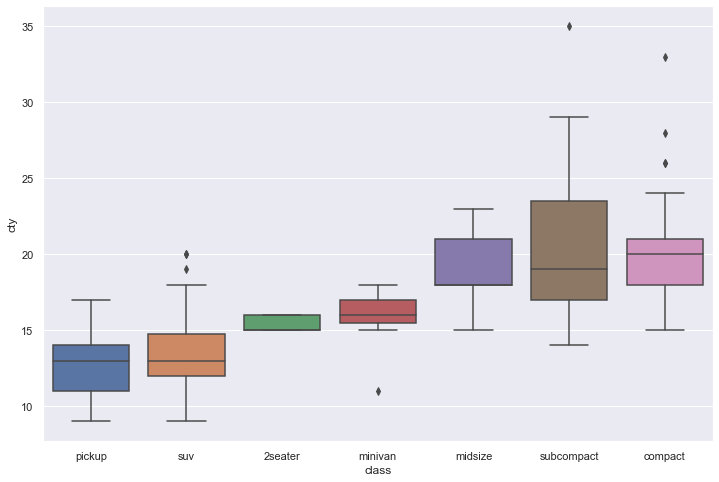

In [34]:
class_order_by_cty = list(mpg[['cty', 'class']].groupby('class').median().sort_values('cty').index)

sns.boxplot(x='class', y='cty', data=mpg, order=class_order_by_cty)
plt.show()

+ **Notes:** 

    + trying to do the same with the pandas `plot.box` function as in the initial plot turns out to be much more complicated, so we strongly recommend using Seaborn here.
    + **Important:** this parallel boxplots are meaningful because all the boxplots refer to the same variable measured in the same units. They may be problematic when the ranges are very different between levels, but that is *very different from plotting boxplots for different variables together*, which is usually meaningless. 

### Group densities

+ Another option is to plot the density curves for each of the factor levels in the same plot:

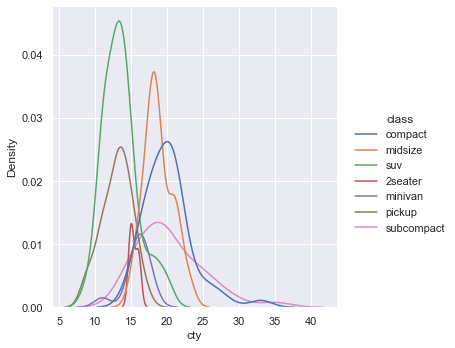

In [35]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.displot(data=mpg, x="cty", hue="class", kind="kde")
plt.show()

+ Of course the boxplot and densities using violinplots to get this: 

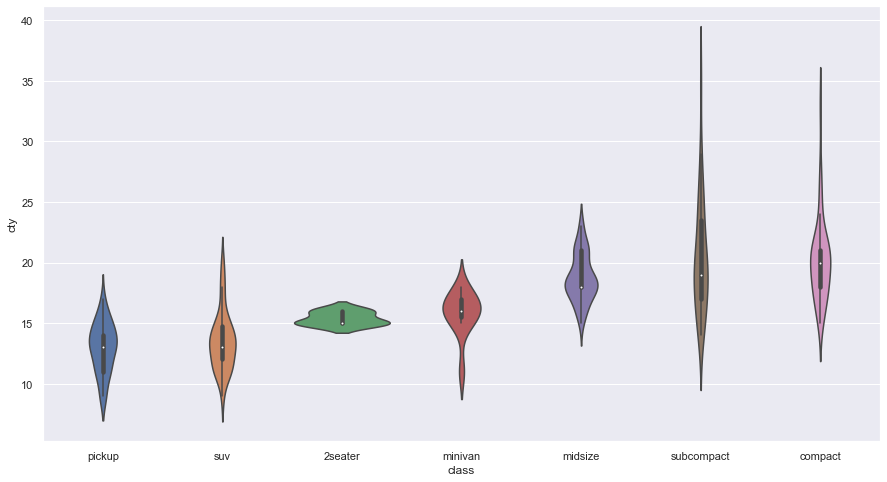

In [36]:
sns.violinplot(data=mpg, x="class", y="cty", order=class_order_by_cty)
plt.show()

+ **Reversing the role of the variables** In the previous plots we have considered the numeric variable as the output and the factor as the input. But note that the very same plots can be used to look at the reversed relation. However, in the special case of a binary (two level) factor, we will see later that there is a special type of graph (the *stripchart* or *striplot*) that is well suited for that situation.

+ **Example:** here we will use a stripplot to add the actual data points to the previous group boxplot. This is often a good idea (e.g. as an alternative to violinplots) to prevent some artifacts that the boxplots may be hiding. Note that the stripplot adds some *jitter* or random noise to the horizontal position to the points to avoid overplotting and improve the visualization.

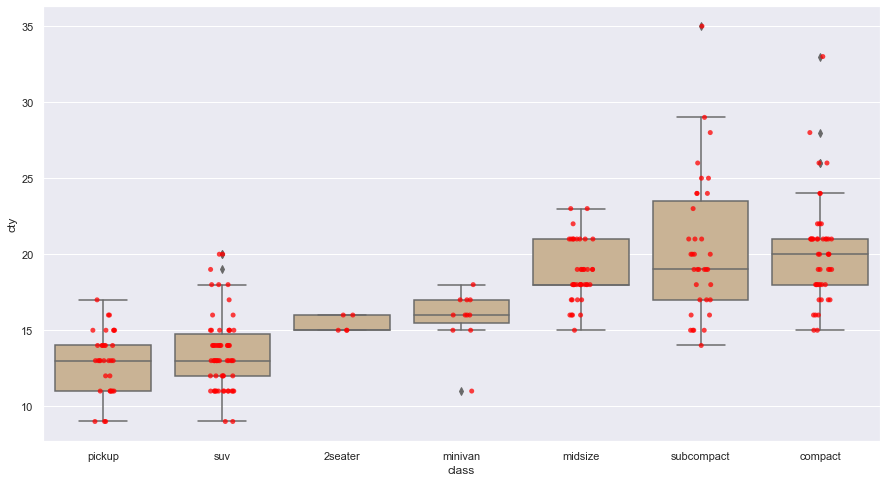

In [37]:
sns.boxplot(x='class', y='cty', data=mpg, order=class_order_by_cty, color = "tan")
sns.stripplot(x='class', y='cty', data=mpg, order=class_order_by_cty, color="red", alpha = 0.75)
plt.show()

## Relation Between Two Factors

+ If the two factors have a moderate number of levels, then it is often hard to find a graph that does a better job than a simple two way table. Another option is to do a bar plot of frequencies for one of the factors and show the proportion of each bar corresponding to the other factor. There are variants of this strategy (horizontally or vertically stacked bar plots, mosaic plots, etc).

+ **Example:** The following code cells will draw several bar plots for the two factor relation between the `cyl` and `class` factors in the mpg data set. But first we create a two way table.

In [38]:
CT = pd.crosstab(mpg['class'], mpg['cyl'])
CT

cyl,4,5,6,8
class,,,,
2seater,0,0,0,5
compact,32,2,13,0
midsize,16,0,23,2
minivan,1,0,10,0
pickup,3,0,10,20
subcompact,21,2,7,5
suv,8,0,16,38


+ First we plot a simple **horizontally stacked bar plot** 

<AxesSubplot:xlabel='class'>

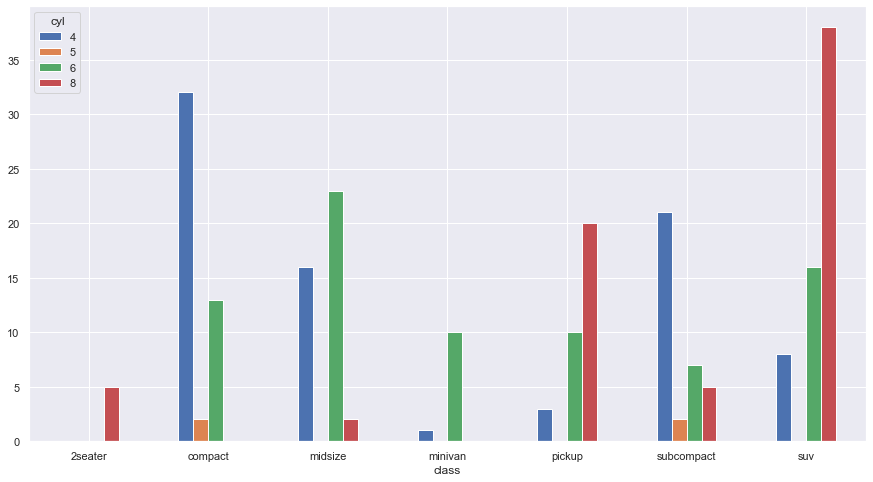

In [39]:
pd.crosstab(mpg['class'], mpg['cyl']).plot.bar(rot = 0)

+ Next we will plot a **vertically stacked bar plot**. In this case we also want to sort the levels of the horizontal axis in increasing order of the total size for that  level. This adds additional visual information about the nature of this relation.

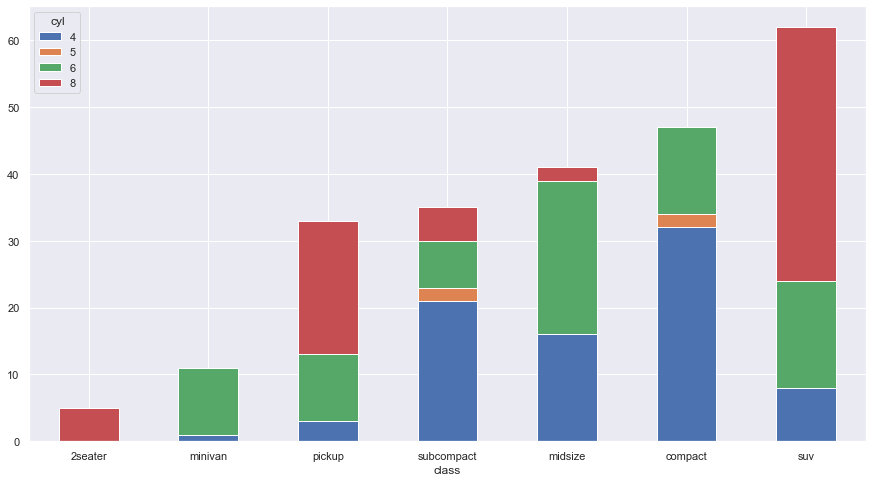

In [40]:
# We add to the table the totals for each row
CT['total'] = CT.sum(axis=1)
# Sort the table using those totals
CT.sort_values('total', inplace=True)
# Remove them so thay do not interfere with the graphic
CT2= CT.drop(columns='total')
# And plot the bar plot
ax = CT2.plot.bar(stacked = True, rot = 0)



+ And as a bonus, the following code file shows how we can add the percentages as labels:

In [4]:
# %run "./code/07-models-01.py"

## Pairplot Matrices

+ Now we have seen a small gallery of possible graphical representations for the pairwise relation between two variables. We are thus ready for one of the most frequent steps in the initial exploration of a new data set. A **pairplot** is a collection of plots of all the possible pairwise relations between the variables in a data set, arranged in a rectangular grid.

+ **Example:** for the `mpg` data we can get the pairplot with Seaborn as follows:

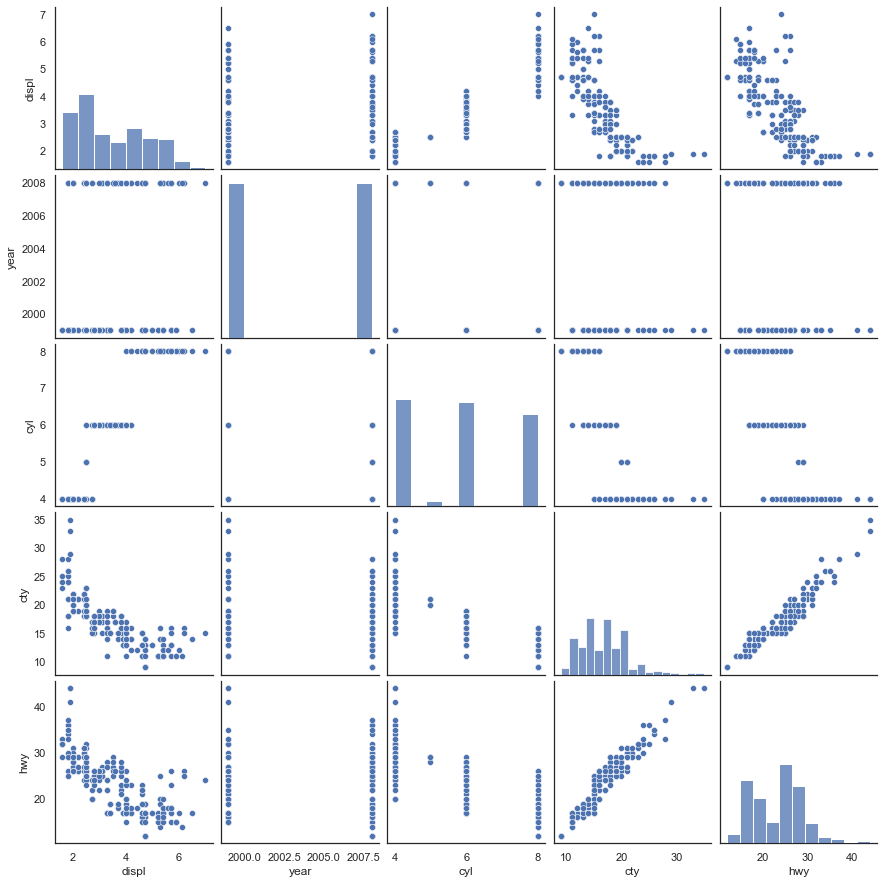

In [42]:
sns.set_style("white")
sns.pairplot(mpg)
plt.show()

+ As the example shows, the plots in the diagonal of the grid describe the distribution of each of the variables of the data set. Every other plot in the grid outside of the diagonal corresponds to a relation of the form $Y\sim X$ where $X$ and $Y$ are the variables corresponding to that column and row of the grid, respectively. You can customize many aspects of this plot and we recommend that you look at the [documentation for `pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

+ You probably have noticed that Seaborn only uses the numerical variables for this pairplot (in R, e.g., factors are also included). If we want to see the way that a factor is related to the numerical variables we can use it through the `hue` option. This kind of plot often helps to realize that some numerical discrete variables are behaving like factors and should probably be considered as such. See e.g. the `year` and `cyl` variables in `mpg`.

+ **Example:** let us repeat the pairplot for the `mpg` data but conditioning on the  `drv` factor (the type of drive train, with three levels equal to `f` = front-wheel drive, `r` = rear wheel drive, `4` = 4wd)

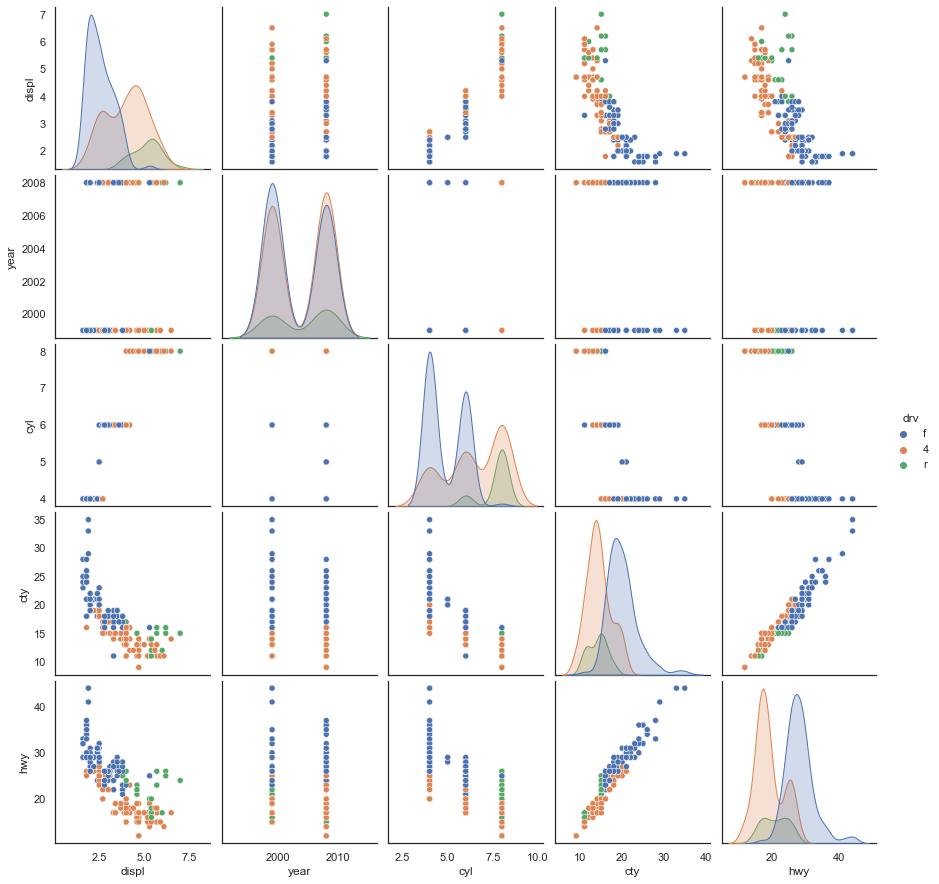

In [43]:
sns.pairplot(mpg, hue="drv")
plt.show()

+ As you can see, `hue` uses color to illustrate the way that the factor levels appear when looking at the pairwise relations. The diagonal can be used now to explore the possible relations $X\sim F$ where $F$ is the factor and $X$ runs through all the numerical variables.

+ Be careful and use good judgment when calling `pairplot`. For large data sets with many variables and many observations obtaining the grid can be time consuming and the final result may be too crammed to be of any real use. In such cases you should think about exploring groups of variables instead of the whole set. Seaborn provides the `x_vars` and `y_vars` arguments of `pairplot` for this. 

+ **Example:** remove the comment and run the code below to see what we mean.

In [44]:
# framingham_url = "https://raw.githubusercontent.com/mbdfmad/fmad2122/main/data/framingham.csv"
# framingham = pd.read_csv(framingham_url)
# sns.pairplot(framingham)

+ Now do the same here:

In [45]:
#var_group = framingham.columns[12:16]
#print(var_group)
#sns.pairplot(framingham, x_vars=var_group, y_vars=var_group)

## Patterns and Models

+ The plots, tables and statistical information that we are gathering in EDA (exploratory analysis) should help us look for the presence of *patterns* or *trends* in our data. Those patterns and trends hint at the possible existence of the relations between variables we are looking for. When looking for those patterns keep the following in mind:

    + Can this pattern be just appearing because of random chance?
    + How would you describe the pattern?
    + How strong seems this to be?
    + Can the pattern be under the influence of other variables? In particular, does it change when you consider subgroups (levels of factors)?  

 **Note:** The above list comes from [Section 7.6 of R for Data Science](https://r4ds.had.co.nz/exploratory-data-analysis.html#patterns-and-models). That is a wonderful book in case you ever need to think about using R for Data Science (but probably not if you are just starting with R).
 
+ A **(statistical) model** is a formal (theoretical) description of the relation between some random variables. Just like random variables themselves are theoretical versions of experiments a model is a theoretical version of the patterns that we observe in data. We will next review one of the most basic and classical examples of statistical models, the *simple linear regression model*.


# Simple Linear Regression

## Introduction

+ **Example: (Oxygen Consumption and Temperature in Common Blue Tits)** Authors Haftorn and Reinertsen wrote a 1985 paper (see the [References Section](#References) below) about the relationship between oxygen consumption and air temperature in the incubating females of the [*Eurasian blue tit (Cyanistes caeruleus)*](https://en.wikipedia.org/wiki/Eurasian_blue_tit) a common small passerine bird like the one in the picture below:
![](./fig/07-Herrerillo.png)

 Think about this questions:  
   + What do you expect to happen with the oxygen consumption as the air temperature drops?
   + Are those two variables equally easy to measure?

+ The two variables involved in this study are both of them continuous, so the result of a set of measurements will be a collection of pairs 
$$
\quad\\
(x_1, y_1),\, (x_2, y_2), \ldots,\, (x_n, y_n)
\quad\\
$$
that we can represent as points in a scatter plot like the ones we have seen before. 

+ This example can be described in symbols as
$$
O_2\sim T
$$
We are using air temperature $T$ as input variable and $O_2$ as output because of what your intuition told you after thinking about the questions above. That same intuition is surely leading you to the conjecture that when you place air temperature in the $X$ axis and oxygen consumption $(O_2)$ on the $Y$ axis then the points of the scatter plot will describe a trend such as this one:
![](./fig/07-IntuicionProblemaHerrerillos.png)
The data collected by the authors of that paper resulted in this scatter plot (there are two samples represented by different symbols, one for the incubation period and the other outside that period):
![](./fig/07-Figura05HaftornReinertsenHerrerillos.png)
This confirms our intuition and is a typical example of the kind of pattern we are looking for. You can see that the authors have drawn to straight lines (one for each sample). This straight lines are a *mathematical abstract model* of the trend that appears in the data. Many other variables, aside from air temperature, play a role in the $O_2$ consumption for these birds. So none expects the relation between these two variables to be perfectly described by such an abstraction as a straight line is! Every real world relation is noisy, even the most controlled lab experiments include some level of noise in their measurements. But the straight line in that picture is the model or signal that *best describes* the trend that we observe in the data. In what sense do we say it is *the best*?

## Noisy relations

+ The three scatter plots below show examples of noisy relations $Y\sim X$ between two continuous variables (the $X$ values are the same in the three plots).


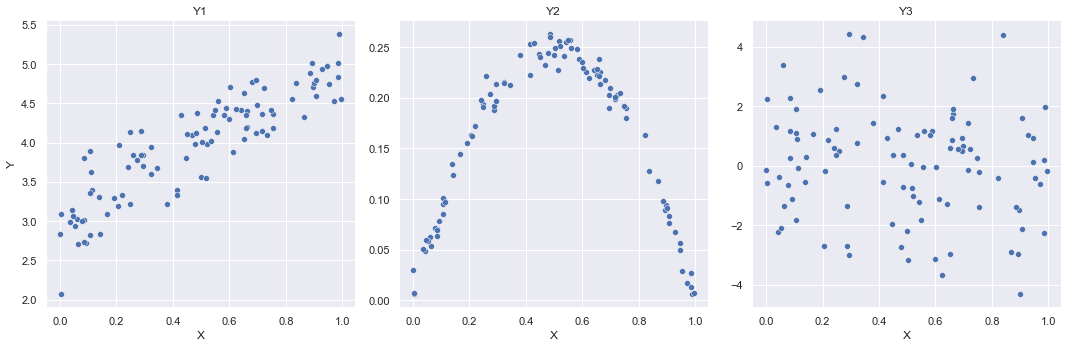

In [46]:
%run ./code/07-models-02.py

+ The first one on the left is a relation that can be well described using a straight line as a model, like in the birds example. The central panel also shows a clear and well defined relation between the variables (*strong signal, weak noise*). But it would be foolish to try to describe it with a straight line. The last one, finally, does not seem to show any discernible pattern (*weak or no signal, very strong noise*), and so it seems that this variables are unrelated.

## The Regression Line

+ So we will try to focus in a situation like the first panel from the left, where the relation $Y\sim X$ seems to be well suited to be described using a straight line. We want to choose the **best possible** straight line, and we will call it the **regression line** for $Y\sim X$.  

+ The data for that example (first panel) are contained in the [07_simple_linear_regression_01.csv](./data/07_simple_linear_regression_01.csv) file. In this example the best line is the one that appears below. We will soon discuss the code details. But to get there we will follow these steps:

  1. First we will clarify what we mean by *the best straight line.*
  2. Then we will see how to obtain that line, both theoretically and using Python.
  3. We will see that sometimes even the best possible line is really bad.

The regression line is y = 3.00341 + 2.00299 x


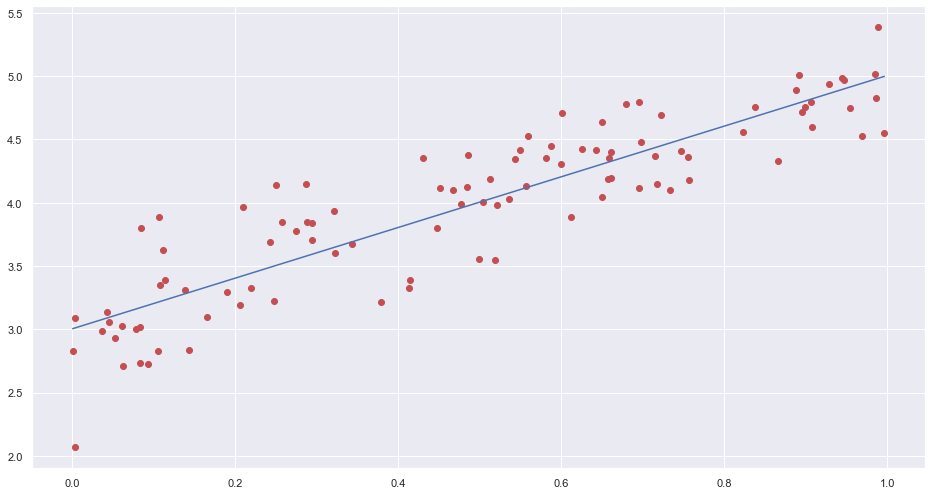

In [47]:
%run ./code/07-models-03.py

## The Regression Line Equation. Predicted Values and Residuals.

+ To carry on with our plan we introduce some notation. The equation of the regression line will be written as:
$$
y = b_0 + b_1\, x
$$
  where $b_1$ is the **slope** of the line. The sign of $b_1$ reflects if the line is going up or down as we move to the right. Its absolute value equals how many units $y$ changes when $x$ changes by one unit. The value of $y$ when $x = 0$ is $b_0$, the **intercept**. 

+ Let us assume that $b_0$ and $b_1$ are known values. Then if the sample points are:
$$
(x_1, y_1),\, (x_2, y_2), \ldots,\, (x_n, y_n)
$$
  when we plug each $x_i$ in the equation of the regression line we get  *another value* of $y$ (usually different from $y_i$), that we call the **predicted value** and denote by
$$
\hat y_i = b_0 + b_1\, x_i,\quad\text{for each }\quad i =1,\ldots,n
$$

+ The **residuals** are the differences:
$$e_1 = y_1 - \hat y_1,\,\quad  e_2 = y_2 - \hat y_2,\quad  \ldots\quad ,\,e_n = y_n - \hat y_n $$    

+ All these terms are illustrated in the figure below:
  + The red dots correspond to the original sample points, with (vertical coordinates) $y_1, \ldots, y_n$.
  + The green dots are the predicted values, with $\hat y_1, \ldots, \hat  y_n$.
  + The residuals $e_1, \ldots, e_n$ measure the lengths of the vertical segments connecting each red point to the corresponding green one.
  
![](./fig/07-Residuos.png)

## Mean Squared Error (MSE)


+ Since the residuals measure the vertical distance from the predicted to the actual value, a good regression line should give us a **small residuals average**. Note that we need to think about some kind of residual average, because otherwise the line could be good in some regions and really bad in some others. 

+ The first idea that comes to mind is to take the mean of the residuals. But then the positive and negative ones could cancel and that would be a misleading measure of the quality of that line. We could take absolute values, but we have already seen that this way leads to complicated mathematics. Therefore we give a different definition.

+ The **square error** for the line given by $b_0$ and $b_1$ is:
$$
EC =
\sum_{i=1}^n e_i^2 =
\sum_{i=1}^n(y_i-\hat y_i)^2 =
\sum_{i=1}^n(y_i-b_0-b_1\cdot x_i)^2.
$$
and the **(sample) square mean error** is 
$$\operatorname{SME} = \dfrac{EC}{n-1}$$
You can probably guess the reason why we divide by $n - 1$ instead of $n$, we will return to that issue below.

+ The idea of the square error (and the *least squares method*) is illustrated in this figure [and this link](https://www.geogebra.org/m/pryzjnya)
![](./fig/07-InterpretacionErrorCuadratico.png)

## The Coefficients of the Regression Line

+ The best line (the linear regression line) is the one with those values of $b_0, b_1$ that result in the least squared error. Using Calculus to solve that optimization problem leads to this:
<p style='font-family: Optima;color:blue;background-color:#f0f0f5'>
$$
\fbox{
$
\quad\\
\hspace{0.5cm}\textbf{Equation of the Linear Regression Line.}
\quad\\
\quad\\
\hspace{1cm}(y-\bar y)=\dfrac{\text{Cov}(x,y)}{s^2(x)}\cdot (x-\bar x)
\quad\\
\quad\\
\text{where the }\textbf{sample covariance}\text{ is:}
\quad\\
\quad\\
\hspace{1cm}\text{Cov}(x,y)=\dfrac{\displaystyle\sum_{i=1}^{n}(x_i-\bar x)(y_i-\bar y)}{n-1}
\quad\\
\quad\\
\text{Therefore the coefficients of the regression line are:}
\quad\\
\quad\\
\hspace{1cm} 
\begin{cases}
b_1= & \dfrac{\text{Cov}(x,y)}{s^2(x)}\\[5mm]
b_0= & \bar y - \dfrac{\text{Cov}(x,y)}{s^2(x)}\cdot\bar x
\end{cases}
\quad\\
\quad\\
$
}
$$
</p> 

+ **Note** in particular these results have two important consequences:
  + The regression line always goes through the *sample center*, the point $(\bar X, \bar Y)$.
  + The sum of the residuals for the regression line is always 0.



+ **Example:** since this is the first time we are doing this, we will use Python and the above equations to obtain the regression line for the data in the [07_simple_linear_regression_01.csv](./data/07_simple_linear_regression_01.csv) file. To be clear: this is not the best way to do this in Python, we are just doing it now for the sake of practice and to learn about covariance in Python. For an array-like structure $A$ (NumPy array or Pandas DataFrame with numeric columns), the `cov` function returns a matrix $C$, where the $C[i, j]$ element is the covariance of the $i$-th and $j$-th columns of $A$, and the diagonal of $C$ contains the variances for each column of $A$. This $C$ is called the **covariance matrix** of the $A$ columns.

In [48]:
# Load the data
A = pd.read_csv("./data/07_simple_linear_regression_01.csv")

# Check the column names
print(A.head()) 

# Compute the covariance matrix.
# In this case A only has two columns, but in general we 
# may need to select the columns before getting the covariance matrix. 
COV_A = A[['X', 'Y']].cov()
print("--"*20, "\n")
print("This is the covariance matrix: \n", COV_A)
print(COV_A)

# We extract the elements of the covariance matrix that
# we need for the regression line:
cov_A = COV_A.iloc[0, 1]
s2_x = COV_A.iloc[0, 0]

# Compute the means of the columns
barX = XY.X.mean()
barY = XY.Y.mean()

# and plug all these values in the equations
# for the regression line coefficients
b1 = cov_A / s2_x
b0 = barY - b1 * barX 
print("--"*20, "\n")
print("The regression line coefficients are \n b0 = {:.6} \n b1 = {:.6}".format(b0, b1))


          X         Y
0  0.247426  3.222475
1  0.092990  2.725928
2  0.611763  3.885317
3  0.060662  3.023520
4  0.661033  4.196188
---------------------------------------- 

This is the covariance matrix: 
           X         Y
X  0.090223  0.180715
Y  0.180715  0.455194
          X         Y
X  0.090223  0.180715
Y  0.180715  0.455194
---------------------------------------- 

The regression line coefficients are 
 b0 = 3.00341 
 b1 = 2.00299


+ You can check that these are the same numbers that appear over the plot for this example that we saw before.

## The Regression Line in Python (with `scikit-learn`)

+ As we have mentioned, the above step-by-step procedure is certainly not the usual way to get a regression line in Python. We can do this in several faster ways, but here we will use Scikit-Learn, as this will later generalize easily to more complicated models. 

+ The following code assumes that your data is stored in two columns of a pandas DataFrame. In other cases the starting point could be a NumPy array, etc. and the code may require some adjustments. 

In [49]:
# Load the data into a pandas DataFrame
A = pd.read_csv("./data/07_simple_linear_regression_01.csv")

# The linear regression model in Scikit requires that
# the X array be two-dimensional. But in our case a 
# single column gives a 1D array. That is why, after
# extracting the values from the columns we reshape it.
X = A.X.values
X = X[:, np.newaxis]

# For Y it is enough to extract the values,
# because Scikit already expects it to be 1D
Y = A.Y.values

# Now we load the required function from the scikit module
from sklearn.linear_model import LinearRegression
# Create the model
modelXY = LinearRegression(fit_intercept=True)
# Fit the model to 
XY_fit = modelXY.fit(X, Y)

# And extract the coefficients. 
# Note that b1 is returned as an array 
b1 = XY_fit.coef_[0]
b0 = XY_fit.intercept_

print("The regression line is y = {:.6} + {:.6} x".format(b0, b1))


The regression line is y = 3.00341 + 2.00299 x


## Predicting Values

+ Now that we have a way to obtain a regression line, let us put it to use. One of the main goals of having a model is the ability to **predict** unobserved values. Let us see how to that in our example:

+ **Example:** The range of the $X$ values in our example is approximately the $[0, 1]$ interval:

In [50]:
[X.min(), X.max()]

[0.0005218477242485, 0.9960870122797092]

+ Let us check that $X = 0.3$ is not in the sample:

In [51]:
np.any(X == 0.3)

False

+ We can try to use our regression line to predict the value of $Y$ for $X = 0.3$. Resist the temptation to substitute in the line equation! We are going to see how to do this with the Scikit modeling language. That way you will use very similar syntax when you learn about more complicated models in Machine Learning.

In [52]:
# Create an array from the list of X coordinates of new observtions
X_new = np.array([0.3])
# Make it 2D
X_new = X_new[:, np.newaxis]
# Use the predict method from our model
Y_new = XY_fit.predict(X_new)
# Look at the predicted values
Y_new

array([3.6043027])

+ In fact, the same idea works for a lot of new values. And we can use that to plot the regression line by: (1) generating a grid with a large number of values of X through the range of the sample, (2) predicting their Y coordinates using the regression line and (3) plotting the predicted points.

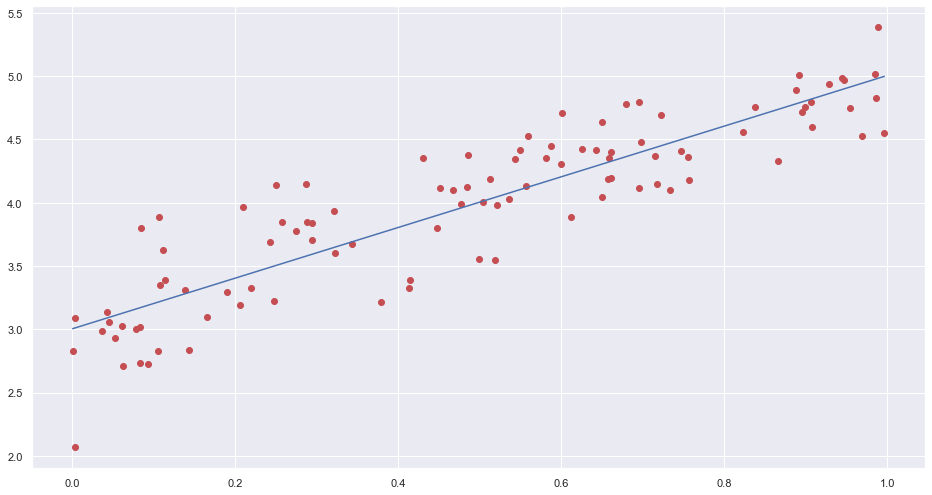

In [53]:
# The linspace funtion generates the grid
X_new = np.linspace(X.min(), X.max(), num = 100)
# Make it 2D
X_new = X_new[:, np.newaxis]

# Predict the corresponding Y-values
Y_new = XY_fit.predict(X_new)

#Plot the sample
plt.plot(X, Y, 'ro')
# And the regression line = "predicted points"
plt.plot(X_new, Y_new)
plt.show()

## Extrapolation and Overfitting

+ **Extrapolation** occurs when we try to use the linear regression line to predict $Y$ starting with values of $X$ outside of the range of the sample. This is a big mistake and should always be avoided. We will see below that there are strong statistical reasons for our lack of confidence in any such *out of range* prediction.

+ While extrapolation is specially worrisome in the case of linear regression, the phenomenon of **overfitting** is a more general problem that you will discuss at length in Machine Learning. Here we will just give you a hint about it, by way of an example  that we will discuss in the session, illustrated in the figure below and [in this link](https://www.geogebra.org/m/v6hsfrbx).
![](./fig/07-Overfitting.png)
When playing with this example compare the stability of the model provided by the regression line as opposed to the more "sophisticated" polynomial model.

# Goodness of Fit in Simple Linear Regression

+ The *least squares method* that we have seen will let you fit a regression *even in cases when it does not make much sense to do so!* Returning to the example with three different samples that we saw before and add the regression line to each of them.

+ **Exercise (S07-001):** the three samples are contained in these files:   

   + [./data/07_simple_linear_regression_01.csv](./data/07_simple_linear_regression_01.csv)  
   + [./data/07_simple_linear_regression_02.csv](./data/07_simple_linear_regression_02.csv) 
   + [./data/07_simple_linear_regression_03.csv](./data/07_simple_linear_regression_03.csv)
   
  Find the regression lines for all of them and plot each one together with the sample points as we did before. **Big Hint:** we have already done that for the first one.

In [54]:
#%load "./exclude/S07-001.py"

+ When you run this exercise you will see that the regression line does not seem to be a good model of the data in the last both cases, but for different reasons. Can you see the difference?

## Analysis of Variance and ANOVA Identity for Simple Linear Regression

+ Recall that the squared error was
$$  SE =  \sum_{i=1}^n e_i^2 =  \sum_{i=1}^n(y_i-\hat y_i)^2 =\sum_{i=1}^n(y_i-b_0-b_1\cdot x_i)^2.$$
This squared error is defined from the residuals of the linear regression and it is therefore connected to the *noise* part of that *noise / signal* duality we have been talking about.

+ You may have noticed that the second term above resembles the numerator of the variance of $y$. Playing with that idea and doing some algebra we arrive at this very important expression:
<p style='font-family: Optima;color:blue;background-color:#f0f0f5;font-size:25'>
$$
\fbox{
$
\quad\\
\hspace{0.5cm}\textbf{Anova Identity for Simple Linear Regression.}
\quad\\
\quad\\
\hspace{1cm}
\underbrace{\displaystyle\sum_{i=1}^{n}(y_i-\bar y)^2 }_{SStotal}=
\underbrace{\sum_{i=1}^n e_i^2}_{SSresidual} + 
\underbrace{\sum_{i=1}^n(\hat y_i-\bar y)^2}_{SSmodel}
\quad\\
\quad\\
$
}
$$
</p> 

  This equation provides a decomposition of the total spread $SStotal$ of the response $y$ values.  We have already mentioned that $SSresidual$ is related to the *noise* in the data. But the $SSmodel$ term is obtained from the predicted values of the model. That is, even if there was no noise at all and the original data were perfectly placed on this regression line, their $y$ coordinates would be vertically spread, *simply due to the slope of the regression line itself*. That means that this component of the total $y$ spread is the part that is fully **explained by the model**.

## Goodness of Fit and Pearson's Correlation Coefficient

+ Dividing the Anova identity by $SStotal$ we arrive at:
  $$
  1 = \dfrac{SS_{residual}}{SS_{total}} + \dfrac{SS_{model}}{SS_{total}} = 
  \dfrac{\mbox{EC}}{\displaystyle\sum_{i=1}^{n}(y_i-\bar y)^2}
  +
  \dfrac{\displaystyle\sum_{i=1}^n(\hat y_i-\bar y)^2}{\displaystyle\sum_{i=1}^{n}(y_i-\bar y)^2}
  $$
  The division guarantees that the terms on the right hand side:  
    $(a)$ are *dimensionless* (or *unit-less*) and do not depend on the scale of the problem.  
    $(b)$ are *positive and add up to 1*. 
    $(c)$ the first term refers to the  *noisy* component of the data, while the second refers to the  *model*  (the regression line). 
  
+ In particular, this seems to indicate that quality of the regression line increases the bigger this second term is  (and therefore, the smaller the second one is). 

+ If we plug $(\hat y_i - \bar y) =  \dfrac{\text{Cov}(x,y)}{s^2(x)}(x - x_i)$ into $SS_{model}$ we arrive at
  $$
  1 = \dfrac{\mbox{EC}}{\displaystyle\sum_{i=1}^{n}(y_i-\bar y)^2} + \left(
  \dfrac{\text{Cov}(x,y)}{s(x)\cdot s(y)} \right)^2
  $$
  And the term in parenthesis is therefore a measure of the **goodness of fit** to the data provided by this regression line model. Let us give it a name:
<p style='font-family: Optima;color:blue;background-color:#f0f0f5;font-size:25'>
$$
\fbox{
$
\quad\\
\hspace{0.5cm}\textbf{Pearson's Correlation Coefficient $R$}
\quad\\
\quad\\
\hspace{1cm} R = \text{Cor}(x,y) = \overbrace{\text{Cor}(y, x)}^{\text{is symmetrical }} = \dfrac{\text{Cov}(x,y)}{{s(x)\cdot s(y)}}
\quad\\
\quad\\
$
}
$$
</p> 

+ **Example:** for the data in the `A` pandas DataFrame (the data from the first of our three samples, in file `07_simple_linear_regression_01.csv`) we can compute the Pearson correlation as:

In [55]:
np.corrcoef(A, rowvar=False)

array([[1.       , 0.8917388],
       [0.8917388, 1.       ]])

+ We need to use `rowvar = False` because this NumPy function by default assumes that rows are variables and columns are observations (that is too bad...). Note that we get a matrix, because `corrcoef` computes the correlation of every column against the rest (analogous to what we saw for the covariance matrix), including the correlation of each column against itself which is why the diagonal will always be one. 

+ On the other hand, pandas has its own correlation method that may be simpler to apply in many cases:

In [56]:
A.corr()

,X,Y
X,1.000000,0.891739
Y,0.891739,1.000000


+ **Exercise (S07-002)** compute the correlation coefficient for the data in the two other samples:  
`07_simple_linear_regression_02.csv` and `07_simple_linear_regression_03.csv`

+ Using the correlation coefficient we can rewrite some previous results:
    + The **Anova identity** is
    $$1 = \dfrac{SS_{residual}}{SS_{total}} + R^2$$
    + The **regression line equation** is
    $$(y - \bar y) = \text{Cor}(x,y)\dfrac{s(y)}{{s(x)}} (x - \bar x)$$

### Properties and Interpretation of the Correlation Coefficient

+ Simmetry: $\text{Cor(X, Y)} = \text{Cor(Y, X)}$. The correlation coefficient is a dimensionless number between $-1$ and $1$. The sign of $R$ is the same the sign of the slope $b_1$ for the regression line. Thus, if $R > 0$ the line increases and conversely.

+ $R$ only equals $1$ or $-1$ when **every point** in the sample is perfectly aligned on the regression line.

+ $R^2$ is called the **coefficient of determination** and it represents the proportion (or percent) of the total $y$ variation that can be explained by the model.

+ Let $\tilde x_i = \frac{x_i - \bar x}{s_x}$ be the centered and scaled values of the $x_i$ and similarly let $\tilde y_i$ be the centered and scaled values of the $y_i$. The regression line can be written 
$$\tilde y_i = R\cdot \tilde x_i$$ 
  This can be seen as a regressionline for $\tilde y$ and $\tilde x$. Its slope has an absolute value smaller than one, thus explaining the phenomenon known as *regression to the mean*, that gives name to the whole method.

+ **Interpretation of R (IMPORTANT):**   
    $-$ Whenever $R$ is close to 0, the fit of the line to the data is certainly bad.  
    $-$ Whenever the fit of the line to the data is good bad, then $|R|$ is close to 1.
    $-$ **Be careful, it does not work the other way round!** If the value $|R|$ is close to 1 that  **does not guarantee by itself  the goodness of fit. Always check the fit, at least graphically!**
    
+ Take a look at this figure and note that *the lowest $R$ value corresponds precisely to the one case where the line is a indeed a good fit for the data
    ![](./fig/07-PearsonR_Interpretation_01.png)
  Another important observation about correlation is that it should not be interpreted as causality. Too often the news headlines run sentences like "using (or eating) A linked to cases of B". And this often comes after a study found a correlation between those two things, without the study proving (or even trying to prove) any sort of causality. 
![](./fig/07-fig00-XKCD552correlationCausation.png)  

+ **Exercise (S07-003)**  

  (a) Use the `mpg` data set. After performing a pairplot, identify the variable pairs for which a linear regression seems to appear. Find the regression line and correlation coefficient for these pairs.  
  (b) Do the same for the `framingham` data set.

In [57]:
mpg_link = "https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/mpg.csv"
mpg = pd.read_csv(mpg_link)

# The linear regression model in Scikit requires that
# the X array be two-dimensional. But in our case a 
# single column gives a 1D array. That is why, after
# extracting the values from the columns we reshape it.
X = mpg.cty.values
X = X[:, np.newaxis]

# For Y it is enough to extract the values,
# because Scikit already expects it to be 1D
Y = mpg.hwy.values

# Now we load the required function from the scikit module
from sklearn.linear_model import LinearRegression
# Create the model
modelXY = LinearRegression(fit_intercept=True)
# Fit the model to 
XY_fit = modelXY.fit(X, Y)
XY_fit.coef_


array([1.33745561])

# References

+ Haftorn, S., & Reinertsen, R. E. (1985). The effect of temperature and clutch size on the energetic cost of incubation in a free-living blue tit (Parus caeruleus). The Auk, 470–478.